Arbre de décision: quelques expériences

In [1]:
import pickle
import numpy as np
from decisiontree import DecisionTree
import matplotlib.pyplot as plt

In [2]:
# data : tableau ( films , features ) , id2titles : dictionnaire id -> titre ,
# fields : id feature -> nom
[ data , id2titles , fields ]= pickle.load(open ("imdb_extrait.pkl","rb"))

# la derniere colonne est le vote
datax = data [: ,:32]
datay = np . array ([1 if x [33] >6.5 else -1 for x in data ])

In [3]:
dt = DecisionTree ()

for i in range (5,20,5):
    dt.max_depth = i # on fixe la taille de l ’ arbre a 5
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit( datax , datay )
    dt.predict(datax [:5 ,:])

    print(dt.score(datax,datay))

    # dessine l ’ arbre dans un fichier pdf si pydot est installe .
    dt.to_pdf("test_tree"+str(i)+".pdf", fields )
    # sinon utiliser http :// www . webgraphviz . com /
    dt.to_dot(fields)
    # ou dans la console
    #print ( dt.print_tree ( fields ))


0.736429038587312
0.8210159145410943
0.8820579899716591


Observation sur le nombre d'exemples séparés en fonction de la profondeur:

Lorsque on augmente la profondeur de l'arbre , on remarque que l'arbre garde les mêmes noeuds tests (avec le même nombre d'éléments séparés) sur les niveau présents sur l'arbre dont la profondeur était plus petite.
Si je prend un Arbre A de profondeur 5 , et un Arbre B de profondeur 10 ; alors les les 5 premiers niveau de B seront identique à ceux de A. Mais sur l'Arbre B , si au niveau 5 il y a des noeuds sur lesquelles on peut séparer des données , alors on créera des nouveaux noeuds tests sur les niveaux suivants. L'arbre B continuera à séparer des données si il estime que c'est necessaire. Une branche de son arbre ne pourra pas dépasser le niveau 10. 

Je penses que c'est normal pour l'arbre d'agir ainsi. Car il fait son apprentissage sur le même jeu de donnée.
Il garde les informations qu'il estime être les plus pertinente pour pouvoir prédire correctement la classe d'un exemple.
Le fait d'augmenter la profondeur de l'arbre , ne fait qu'augmenter le nombre de tests sur les niveau où l'arbre estime qu'il est nécessaire de séparer encore les données.


In [4]:
for i in range (5,50,5):
    dt.max_depth = i # on fixe la taille de l ’ arbre a 5
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit( datax , datay )
    
    print( "profondeur="+str(i)+"  /  score="+str(dt.score(datax,datay)) )


profondeur=5  /  score=0.736429038587312
profondeur=10  /  score=0.8210159145410943
profondeur=15  /  score=0.8820579899716591
profondeur=20  /  score=0.8984085458905603
profondeur=25  /  score=0.9001526051885764
profondeur=30  /  score=0.9001526051885764
profondeur=35  /  score=0.9001526051885764
profondeur=40  /  score=0.9001526051885764
profondeur=45  /  score=0.9001526051885764


Plus la profondeur augmente , plus le score de bonne prédiction augmente.
C'est normal , parce que quand on augmente la profondeur , on augmente le nombre de tests sur les niveaux de l'arbre dont les noeuds contiennent beaucoup de données.
En augmentant le nombre de tests sur les noeuds de l'arbre ,on aboutit sur des petits ensembles dans les feuilles.
Plus l'arbre fais des tests sur un jeu de donnés , plus il aura moins de chances de se tromper pour prédire la classe associé à un exemple.

Ces scores ne sont pas des indicateurs fiable du comportement de l algorithme. Car ces scores qu'on obtient , sont obtenue en faisant des prédictions sur les données "d'apprenssitage". Pour calculer ces scores on a utilisé les données qui ont servit à creer l'arbre. Le problème est que l'analyse que l'arbre fait correspond trop aux données d'apprentissage. 
Pour avoir un bon indicateur, il faudrait calculer les scores sur des ensembles different de l'ensemble d'apprentissage.

                                SUR ET SOUS APPRENTISSAGE
                                

In [17]:
p=int(0.2*len(data))
a=data[:p,:32]
t=data[p+1:,:32]
ya = np . array ([1 if x [33] >6.5 else -1 for x in data[:p,:] ])
yt = np . array ([1 if x [33] >6.5 else -1 for x in data[p+1:,:] ])

sa=[]
st=[]
for i in range (5,100,5):
    dt.max_depth = i # on fixe la taille de l ’ arbre a 5
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit( a , ya )
    sa.append( dt.score(a,ya) )
    st.append( dt.score(t,yt) )


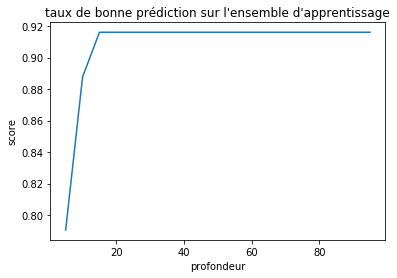

In [19]:
pr=[i for i in range(5,100,5)]
x = np.array(pr)
y = np.array(sa)
plt.plot(x, y)
plt.title("taux de bonne prédiction sur l'ensemble d'apprentissage")
plt.xlabel("profondeur")
plt.ylabel("score")

plt.show() # affiche la figure a l'ecran

On a partitionné l'ensemble des données en 2 partitions. L'ensemble d'apprentissage représente 20 % des données et l'ensemble de test resprésente 80% des données. On remarque sur cette courbe que plus la profondeur de l'arbre augmente , plus le taux d'erreur d'apprentisage diminue.

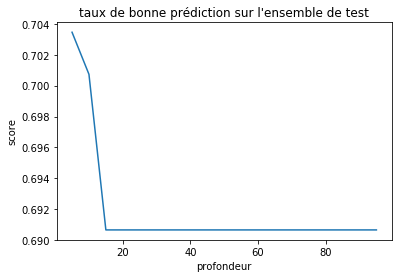

In [20]:
y = np.array(st)
plt.plot(x, y)
plt.title("taux de bonne prédiction sur l'ensemble de test")
plt.xlabel("profondeur")
plt.ylabel("score")

plt.show() # affiche la figure a l'ecran

On remarque que plus la profondeur de l'arbre augmente , plus le taux d'erreur de test augmente.
Maintenant on va faire les mêmes mesures , mais sur des tailles de  partitions différentes.

In [23]:
p=int(0.5*len(data))
a=data[:p,:32]
t=data[p+1:,:32]
ya = np . array ([1 if x [33] >6.5 else -1 for x in data[:p,:] ])
yt = np . array ([1 if x [33] >6.5 else -1 for x in data[p+1:,:] ])

sa=[]
st=[]
for i in range (5,100,5):
    dt.max_depth = i # on fixe la taille de l ’ arbre a 5
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit( a , ya )
    sa.append( dt.score(a,ya) )
    st.append( dt.score(t,yt) )

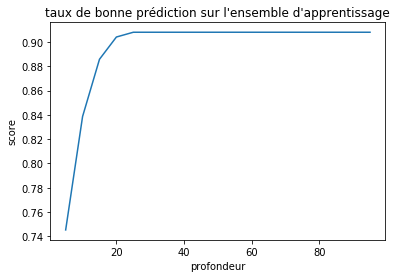

In [24]:
y = np.array(sa)
plt.plot(x, y)
plt.title("taux de bonne prédiction sur l'ensemble d'apprentissage")
plt.xlabel("profondeur")
plt.ylabel("score")

plt.show() # affiche la figure a l'ecran

On a partitionné l'ensemble de départ en deux partition de mêmes tailles. On remarque que plus la profonddeur de l'arbre augmente , plus le taux d'erreur d'apprentissage diminue.

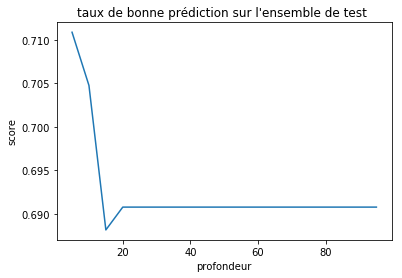

In [25]:
y = np.array(st)
plt.plot(x, y)
plt.title("taux de bonne prédiction sur l'ensemble de test ")
plt.xlabel("profondeur")
plt.ylabel("score")

plt.show() # affiche la figure a l'ecran

On remarque que plus la profondeur de l'arbre augmente , plus le taux d'erreur de test augmente.
Maintenant on va utilisé 80% des données pour constituer notre base d'apprentissage , et les 20% restant pour construite notre ensemble de test.

In [26]:
p=int(0.8*len(data))
a=data[:p,:32]
t=data[p+1:,:32]
ya = np . array ([1 if x [33] >6.5 else -1 for x in data[:p,:] ])
yt = np . array ([1 if x [33] >6.5 else -1 for x in data[p+1:,:] ])

sa=[]
st=[]
for i in range (5,100,5):
    dt.max_depth = i # on fixe la taille de l ’ arbre a 5
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit( a , ya )
    sa.append( dt.score(a,ya) )
    st.append( dt.score(t,yt) )

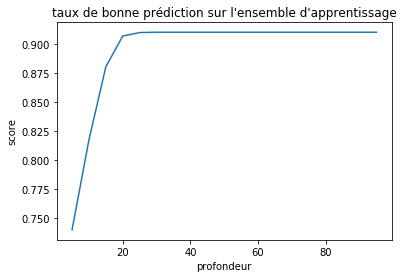

In [28]:
y = np.array(sa)
plt.plot(x, y)
plt.title("taux de bonne prédiction sur l'ensemble d'apprentissage")
plt.xlabel("profondeur")
plt.ylabel("score")

plt.show() # affiche la figure a l'ecran

On reamrque que plus la profondeur de l'arbre augmente ,plus le taux d'erreru d'apprentissage diminue.

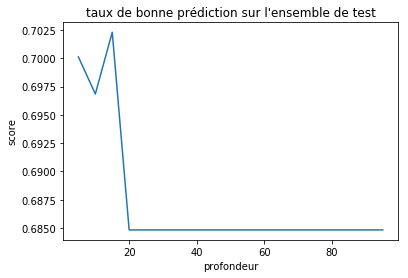

In [29]:
y = np.array(st)
plt.plot(x, y)
plt.title("taux de bonne prédiction sur l'ensemble de test")
plt.xlabel("profondeur")
plt.ylabel("score")

plt.show() # affiche la figure a l'ecran

on remarque que plus la profondeur de l'abre augmente , plus le taux d'erreur de test augmente.
Conclusion : pour des partitionnements différent on obtient les mêmes résultats.
On peut constater que pour une base d'apprentissage plus grande , le taux d'erreur de test augmente vers des valeurs un peu plus grande. Par exemple sur cette courbe , on a un taux de bonne prédiction sur l'ensemble de test égale à 68%. Tandis que sur les autres courbes , pour des grandes valeurs de profondeurs , le taux de bonne prédiction sur l'ensemble de test ne descendait pas en dessous des 69%. (L'écart entre 68 et 69 reste quand même petit). 

Sur la courbe 1 , pour un ensemble d'apprentissage qui représente 20% des données de la base initial, on observe un taux de bonne prédiciton sur l'ensemble d'apprentissage qui varie entre 80% et 92%. Ce taux augmente jusqu'à atteindre une profondeur d'arbre égale à 20 (après il est constant).
Pour un ensemble d'apprentissage qui représente 50% des données de la base initial, ce taux varie de 74% à 90% ,et pour un ensemble d'apprentissage qui représente 80% des données de la base initial
ce taux varie de 75% à 90%. Sur ces 3 ensembles , la progression du taux d'erreur à l'air d'être la même. L'erreur d'apprentissage diminue lorsque la profondeur de l'arbre augmente entre 0 et 20,ensuite elle stagne.

On observe également que pour un ensemble de données tests qui représente 80% des données de la base initial,le taux de bonne prédiciton sur l'ensemble de test varie entre 71% et 68%.Ce taux diminue jusqu'à ce qu'on atteigne une profondeur d'arbre égale à 20 , après il est contant.
C'est à peu près la même chose pour des ensemble de données tests qui représente 50% et 20% des données de la base initial.

                           Validation croisé

In [55]:
d = DecisionTree ()

dt.max_depth = 5 # on fixe la taille de l ’ arbre a 5
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud

def moyenneErr(x,y,k,d):
    np.random.shuffle(x)
    ens=[]
    dy=[]
    scores=[]
    l=int(len(x)/k)
    for i in range (0,k):
        ens.append(x[i*l:(i+1)*l-1,:])
        dy.append(y[i*l:(i+1)*l-1])

    for i in range (0,k):
        t=ens[i]
        ensj=[]
        for j in range (0,k):
            if(j != i):
                ensj.append(j)
        
        a=np.concatenate((ens[ensj[0]], ens[ensj[1]]), axis=0)
        ya=np.concatenate((dy[ensj[0]], dy[ensj[1]]), axis=0)  
        
        for e in range (2,len(ensj)):
            a=np.concatenate((a, ens[ensj[e]]), axis=0)
            ya=np.concatenate((ya, dy[ensj[e]]), axis=0)      
        d.fit( a , ya )    
        scores.append(1-d.score(t,y[i]))
    return np.mean(scores)    

In [56]:
ab=[i for i in range (10,100,10)]
y=[]
for k in range (10,100,10):
    y.append(moyenneErr(datax,datay,k,dt))
    

Text(0, 0.5, "moyenne du taux d'erreur de test")

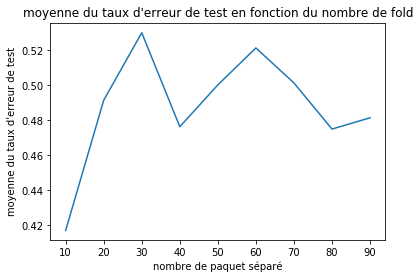

In [58]:
plt.plot(ab, y)
plt.title("moyenne du taux d'erreur de test en fonction du nombre de fold")
#le nombre de fold est le nombre de paquets
plt.xlabel("nombre de paquet séparé")
plt.ylabel("moyenne du taux d'erreur de test")

Comme on le voit sur cette courbe , la moyenne sur le taux d'erreur de test est minimum lorsqu'on divise la base de données initiale en k=10 paquets. Donc pour prendra k-1/k de la base initial pour représenter la base d'apprentissage et 1/k de la base initial pour représenter la base de test.
On va refaire les expériences précédente en prenant 90% de la base de données initiale pour représenter la base d'apprentissage , et 10 % de la base de données initiale pour représenter la base  de test.

In [59]:
p=int(9/10*len(data))
a=data[:p,:32]
t=data[p+1:,:32]
ya = np . array ([1 if x [33] >6.5 else -1 for x in data[:p,:] ])
yt = np . array ([1 if x [33] >6.5 else -1 for x in data[p+1:,:] ])

sa=[]
st=[]
for i in range (5,100,5):
    dt.max_depth = i # on fixe la taille de l ’ arbre a 5
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    dt.fit( a , ya )
    sa.append( dt.score(a,ya) )
    st.append( dt.score(t,yt) )